In [2]:
# Load data training set
import pandas as pd
import numpy as np

housing = pd.read_csv('housing-classification-iter6.csv')
housing.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [3]:
# Check data types
housing.dtypes

LotArea            int64
LotFrontage      float64
TotalBsmtSF        int64
BedroomAbvGr       int64
Fireplaces         int64
                  ...   
PoolQC            object
Fence             object
MiscFeature       object
SaleType          object
SaleCondition     object
Length: 81, dtype: object

In [4]:
housing.isna().sum()

LotArea             0
LotFrontage       259
TotalBsmtSF         0
BedroomAbvGr        0
Fireplaces          0
                 ... 
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
Length: 81, dtype: int64

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

## Create train and test



In [6]:
# Split the data
from sklearn.model_selection import train_test_split

housing.drop_duplicates(inplace=True)

X = housing.drop(columns=['Expensive', 'Id'])
y = housing.filter(['Expensive'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

In [7]:
# Check for duplicated rows
housing.duplicated().sum()

0

In [8]:
# Create diffrent column categories
num_col = ["LotArea", "LotFrontage", "TotalBsmtSF", "BedroomAbvGr", "Fireplaces", "PoolArea", "GarageCars", "WoodDeckSF", "ScreenPorch", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
           "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr", "TotRmsAbvGrd", "GarageArea", "OpenPorchSF",
            "EnclosedPorch", "3SsnPorch", "MiscVal", "MoSold", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"] 
cat_col = ["Foundation", "CentralAir", "Street", "Heating", "Condition1", "MSZoning", "MSSubClass","Alley", "LotShape", "LandContour",
            "Utilities", "LotConfig", "Neighborhood", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Electrical", "GarageType",
            "MiscFeature", "SaleType", "SaleCondition"]
ord_col = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1","KitchenQual", "FireplaceQu", "OverallQual", "OverallCond", "LandSlope", "BsmtFinType2", "HeatingQC",
            "Functional", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence"]

In [9]:
X[ord_col].isna().sum()

ExterQual          0
ExterCond          0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
KitchenQual        0
FireplaceQu      690
OverallQual        0
OverallCond        0
LandSlope          0
BsmtFinType2      38
HeatingQC          0
Functional         0
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
PoolQC          1453
Fence           1179
dtype: int64

## Build the pipeline

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
# Build three preprocessor pipelines 
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())]
)

categorical_transformer = Pipeline(
   steps=[("imputer", SimpleImputer(strategy="constant", fill_value="None")), ("encode", OneHotEncoder(sparse=False, handle_unknown='ignore'))]
)

ordinal_transformer = Pipeline(
   steps=[("imputer", SimpleImputer(strategy="constant", fill_value="None")), ("encode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=999))]
)

# Combine them
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col),
        ("cat", categorical_transformer, cat_col),
        ("ord", ordinal_transformer, ord_col),
    ]
)

# Now we have a full prediction pipeline
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(random_state=42))]
)

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
accuracy_score(preds, y_test)

0.9205479452054794

## Crossvalidation


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__criterion': ["gini", "entropy"],
    'classifier__max_depth': range(1, 10),
    'classifier__min_samples_leaf': range(5, 20, 2),
    'classifier__min_samples_split': range(5, 40, 5),
}
 
search = GridSearchCV(pipe, # pipeline
                      param_grid, # parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use 
                      verbose=1) # informative outputs during the training process

search.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__ord', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__quantile_range', 'preprocessor__num__scaler__unit_variance', 'preprocessor__num__scaler__with_centering', 'preprocessor__num__scaler__with_scaling', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbos

In [50]:
search1 = search.fit(X_train, y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


In [51]:
# check the output
print(search1.best_score_)
print("----------------")
print(search1.best_params_)
print("----------------")
search1.best_estimator_

0.9342465753424658
----------------
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 11, 'classifier__min_samples_split': 30}
----------------


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                             

In [26]:
# Build the ultimate tree

tree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(max_depth = 5, min_samples_split = 30, min_samples_leaf = 5, random_state = 42))]
)

In [27]:
tree = tree.fit(X_train, y_train)
pred = tree.predict(X_test)
accuracy_score(pred, y_test)

0.936986301369863

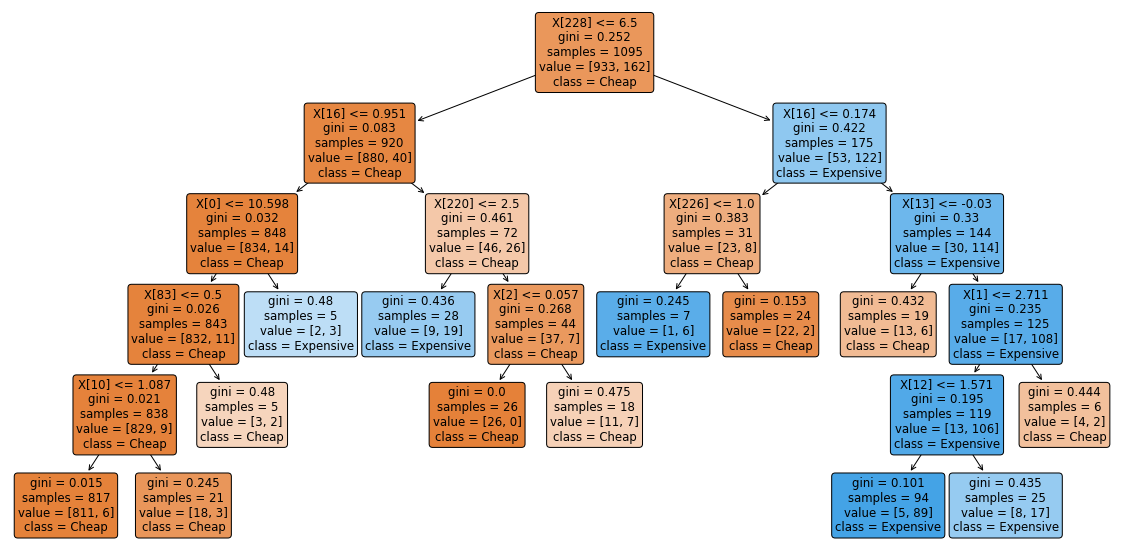

In [28]:
# Plot the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    tree['classifier'],
    filled=True,
    rounded=True,
    class_names=['Cheap','Expensive']
);

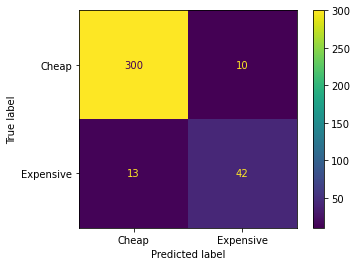

In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

plot_confusion_matrix(tree, X_test, y_test, display_labels=["Cheap", "Expensive"])

In [19]:
# run test dataset and save in csv
test = pd.read_csv("test.csv")
test_without_id = test.drop(columns=["Id"])
test_without_id.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [37]:
test_without_id = test_without_id[X_train.columns]
prediction = tree.predict(test_without_id)
#prediction
test["Expensive"] = prediction
test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Expensive
393,1854,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,0
1003,2464,70,RM,47.0,7755,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,0
495,1956,60,RL,NaN,12511,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2008,WD,Normal,1
640,2101,190,RM,69.0,9142,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0
994,2455,40,RL,55.0,6854,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,0


In [72]:
# Create solutions data frame
solutions = forest_test[["Id", "Expensive"]]
solutions.sample(10)

,Id,Expensive
595,2056,0
1147,2608,0
399,1860,0
865,2326,0
510,1971,1
1086,2547,0
1015,2476,0
1410,2871,0
123,1584,0
111,1572,0


In [73]:
# Export to CSV
solutions.to_csv('submission.csv', index=False)

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

random_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))]
)

random_pipe.fit(X_train, y_train)
ran_preds = random_pipe.predict(X_test)
accuracy_score(ran_preds, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.9561643835616438

In [98]:
params_grid = {
    'classifier__max_depth': range(3, 10),
    'classifier__min_samples_leaf': range(5, 20, 2),
    'classifier__min_samples_split': range(5, 40, 2),
    #'classifier__ccp_alpha': 0.0, 0.04, 0.002
}
 
search = GridSearchCV(random_pipe, # pipeline
                      params_grid, # parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use 
                      verbose=1) # informative outputs during the training process

search.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__ord', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__quantile_range', 'preprocessor__num__scaler__unit_variance', 'preprocessor__num__scaler__with_centering', 'preprocessor__num__scaler__with_scaling', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbos

In [ ]:
random_search = search.fit(X_train, y_train)

In [100]:
# Check the output
print(random_search.best_score_)
print("----------------")
print(random_search.best_params_)
print("----------------")
random_search.best_estimator_

0.9461187214611873
----------------
{'classifier__max_depth': 7, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 11}
----------------


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                             

In [67]:
# Build the ultimate forest

forest = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(max_depth = 7, min_samples_split = 15, min_samples_leaf = 5, random_state = 42))]
)

forest = forest.fit(X, y)
#forest_pred = forest.predict(X_test)
#accuracy_score(forest_pred, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [71]:
# Make the final prediction to test data
forest_test = test
forest_prediction = forest.predict(test_without_id)
forest_test["Expensive"] = forest_prediction
forest_test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Expensive
1183,2644,160,RM,24.0,2160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
461,1922,20,RL,79.0,14463,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,1
105,1566,20,RL,NaN,20062,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,0
1261,2722,60,RL,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,455,6,2006,WD,Normal,0
897,2358,60,RL,NaN,11613,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2007,WD,Normal,0


## SVM

In [85]:
from sklearn.svm import SVC

svm_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(random_state = 42, kernel = "linear"))]
)

svm = svm_pipe.fit(X_train, y_train)
svm_pred = svm_pipe.predict(X_test)
accuracy_score(svm_pred, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9424657534246575

In [87]:
svm = svm_pipe.fit(X, y)
svm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                             

In [88]:
svm_test = test
svm_pred = svm.predict(test_without_id)
svm_test["Expensive"] = svm_pred
svm_solutions = svm_test[["Id", "Expensive"]]
svm_solutions.sample(10)

,Id,Expensive
35,1496,1
1291,2752,0
529,1990,0
1064,2525,0
809,2270,0
504,1965,0
913,2374,1
1407,2868,0
380,1841,0
992,2453,0


In [89]:
# Export to CSV
svm_solutions.to_csv('submission.csv', index=False)